In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(112, 112, 3))

/home/nuru/.local/share/virtualenvs/deepLearn-tC2glvHT/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0         
__________

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

In [4]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(112, 112),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features('data/train', 900)
validation_features, validation_labels = extract_features('data/validation', 450)
test_features, test_labels = extract_features('data/test', 450)

Found 900 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [5]:
train_features = np.reshape(train_features, (900, 3 * 3 * 512))
validation_features = np.reshape(validation_features, (450, 3 * 3 * 512))
test_features = np.reshape(test_features, (450, 3 * 3 * 512))

In [6]:
from keras import models
from keras import layers
from keras import optimizers

In [7]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 3 * 3 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [8]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(train_features, train_labels,
        epochs=50,
        batch_size=50,
        validation_data=(validation_features, validation_labels))

Train on 900 samples, validate on 450 samples
Epoch 1/50
900/900 [==============================] - 3s 3ms/step - loss: 0.9134 - acc: 0.5622 - val_loss: 0.6896 - val_acc: 0.8289
Epoch 2/50
900/900 [==============================] - 2s 2ms/step - loss: 0.7066 - acc: 0.6856 - val_loss: 0.5797 - val_acc: 0.8333
Epoch 3/50
900/900 [==============================] - 2s 2ms/step - loss: 0.5898 - acc: 0.7522 - val_loss: 0.5099 - val_acc: 0.8356
Epoch 4/50
900/900 [==============================] - 2s 2ms/step - loss: 0.5145 - acc: 0.7733 - val_loss: 0.4750 - val_acc: 0.8311
Epoch 5/50
900/900 [==============================] - 2s 2ms/step - loss: 0.4495 - acc: 0.8178 - val_loss: 0.4493 - val_acc: 0.8178
Epoch 6/50
900/900 [==============================] - 2s 2ms/step - loss: 0.4070 - acc: 0.8322 - val_loss: 0.4419 - val_acc: 0.8067
Epoch 7/50
900/900 [==============================] - 2s 2ms/step - loss: 0.3809 - acc: 0.8311 - val_loss: 0.4156 - val_acc: 0.8267
Epoch 8/50
900/900 [==========

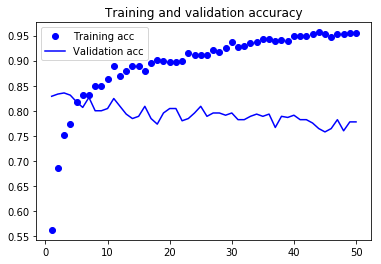

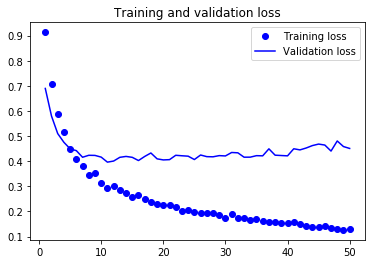

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0         
__________

In [12]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [13]:
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-5),
        metrics=['acc'])

In [15]:
history = model.fit(train_features, train_labels,
        epochs=70,
        batch_size=50,
        validation_data=(validation_features, validation_labels))

Train on 900 samples, validate on 450 samples
Epoch 1/70
900/900 [==============================] - 2s 3ms/step - loss: 0.0835 - acc: 0.9756 - val_loss: 0.3061 - val_acc: 0.8467
Epoch 2/70
900/900 [==============================] - 2s 2ms/step - loss: 0.0843 - acc: 0.9678 - val_loss: 0.3051 - val_acc: 0.8481
Epoch 3/70
900/900 [==============================] - 2s 2ms/step - loss: 0.0841 - acc: 0.9711 - val_loss: 0.3054 - val_acc: 0.8481
Epoch 4/70
900/900 [==============================] - 2s 2ms/step - loss: 0.0776 - acc: 0.9707 - val_loss: 0.3017 - val_acc: 0.8504
Epoch 5/70
900/900 [==============================] - 2s 3ms/step - loss: 0.0802 - acc: 0.9756 - val_loss: 0.2994 - val_acc: 0.8511
Epoch 6/70
900/900 [==============================] - 2s 3ms/step - loss: 0.0799 - acc: 0.9767 - val_loss: 0.3017 - val_acc: 0.8496
Epoch 7/70
900/900 [==============================] - 2s 2ms/step - loss: 0.0796 - acc: 0.9759 - val_loss: 0.2929 - val_acc: 0.8519
Epoch 8/70
900/900 [==========

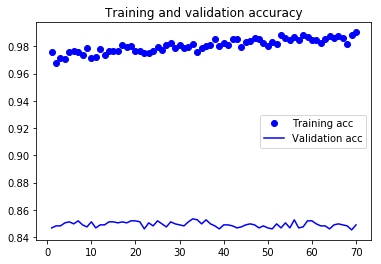

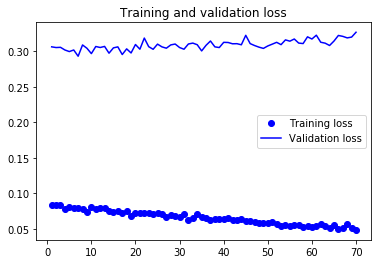

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
model.save('yes3.h5')

In [22]:
test_generator = test_dir.flow_from_directory( 'data/test', target_size=(112, 112),
    batch_size=20,
    class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

AttributeError: 'str' object has no attribute 'flow_from_directory'